In [10]:
# Data Set Information:
# This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.
# The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.
# In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.
# The names and id numbers of the patients were recently removed from the database.


#Nominal data is categorical data that assigns numerical values as an attribute to an object, animal, person or any other 
# non-number. Remember, nominal data are numbers given as codes to certain objects
# Attribute Information:

# Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
# 1: erythema
# 2: scaling
# 3: definite borders
# 4: itching
# 5: koebner phenomenon
# 6: polygonal papules
# 7: follicular papules
# 8: oral mucosal involvement
# 9: knee and elbow involvement
# 10: scalp involvement
# 11: family history, (0 or 1)
# 34: Age (linear)

# Histopathological Attributes: (take values 0, 1, 2, 3)
# 12: melanin incontinence
# 13: eosinophils in the infiltrate
# 14: PNL infiltrate
# 15: fibrosis of the papillary dermis
# 16: exocytosis
# 17: acanthosis
# 18: hyperkeratosis
# 19: parakeratosis
# 20: clubbing of the rete ridges
# 21: elongation of the rete ridges
# 22: thinning of the suprapapillary epidermis
# 23: spongiform pustule
# 24: munro microabcess
# 25: focal hypergranulosis
# 26: disappearance of the granular layer
# 27: vacuolisation and damage of basal layer
# 28: spongiosis
# 29: saw-tooth appearance of retes
# 30: follicular horn plug
# 31: perifollicular parakeratosis
# 32: inflammatory monoluclear inflitrate
# 33: band-like infiltrate

In [11]:
# 8. Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'.

# 9. Class Distribution:
#        Database:  Dermatology
       
#        Class code:   Class:                  Number of instances:
#        1             psoriasis                       112
#        2             seboreic dermatitis             61
#        3             lichen planus                   72
#        4             pityriasis rosea                49
#        5             cronic dermatitis               52    
#        6             pityriasis rubra pilaris        20


In [12]:
# Q:1)Download data sets Dermatology form UCI machine learning repository.
#   2)Data Preprocessing
#     i)  Feature Selection(Ranking of feature using variance, Information Gain(IG) attribute evaluation)
#     ii) Feature Forward method and Feature backwards method 
#     iii)Feature extraction using Principle Component Analysis(PCA)


In [13]:
# Three benefits of performing feature selection before modeling your data are:
# Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
# Improves Accuracy: Less misleading data means modeling accuracy improves.
# Reduces Training Time: Less data means that algorithms train faster.

In [14]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('dermatology_csv.csv')
df.head()
array=df.values
X=array[:,0:34]
y=array[:,34]


In [16]:
#checking if our dataset contains any nan or missing values
df.isnull().sum()


erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [17]:
#1 Ranking features based on the variance
variance=[]
for i in range(X.shape[1]):
    variance.append(np.var(X.transpose()[i]))

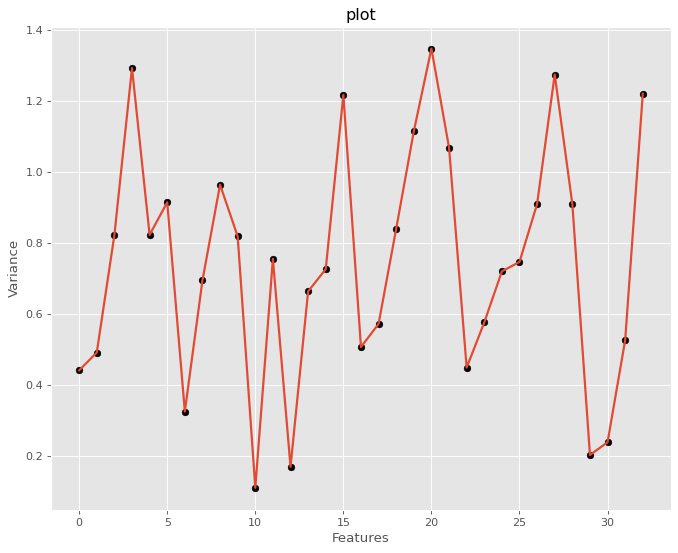

In [18]:
#Plotting the results onto a line graph, allowing us to observe the variance of each features
from matplotlib import style
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80)
style.use('ggplot')
plt.plot(range(0,34), variance,linewidth=2)
plt.scatter(range(0,34), variance,color='black')
plt.title('plot')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

In [19]:
#handling missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X)
X=np.round(imp.transform(X))

In [20]:
#Information gain using decision trees
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf = clf.fit(X, y)

In [21]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


KeyError: 'CONDA_PREFIX'

In [22]:
#feature forward method
#importing the required modules
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier

In [23]:
ffs= SFS(RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0),
         k_features=(1,33),
         forward=True,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=4,
         n_jobs=-1).fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    6.3s finished

[2020-04-25 15:46:46] Features: 1/33 -- score: 0.5027472527472527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    4.9s finished

[2020-04-25 15:46:51] Features: 2/33 -- score: 0.6747790253225036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    5.2s finished

[2020-04-25 15:46:57] Features: 3/33 -- score: 0.7922539417104634[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    5.6s finished

[2020-04-25 15:47:02] Features: 4/33 -- score: 0.8660415671285236[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.5s finished



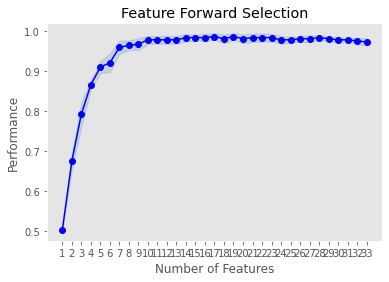

In [25]:
fig = plot_sfs(ffs.get_metric_dict(), kind='std_err')
plt.title('Feature Forward Selection')
plt.grid()
plt.show()

In [26]:
# k best features indices
ffs.k_feature_idx_

(1, 4, 5, 6, 7, 12, 13, 14, 16, 20, 22, 25, 27, 28, 29, 30, 32)

In [27]:
#best score
ffs.k_score_

0.9863234591495461

In [29]:
pd.DataFrame.from_dict(ffs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(20,)","[0.5, 0.5, 0.5054945054945055, 0.5054945054945...",0.502747,"(20,)",0.00440379,0.00274725,0.00158613
2,"(13, 20)","[0.6413043478260869, 0.7391304347826086, 0.659...",0.674779,"(13, 20)",0.0607144,0.0378759,0.0218677
3,"(13, 20, 32)","[0.7391304347826086, 0.8804347826086957, 0.780...",0.792254,"(13, 20, 32)",0.0850972,0.0530869,0.0306497
4,"(13, 14, 20, 32)","[0.8695652173913043, 0.8913043478260869, 0.835...",0.866042,"(13, 14, 20, 32)",0.0321433,0.0200522,0.0115772
5,"(13, 14, 20, 29, 32)","[0.8804347826086957, 0.9456521739130435, 0.890...",0.909818,"(13, 14, 20, 29, 32)",0.0417366,0.0260368,0.0150324
6,"(4, 13, 14, 20, 29, 32)","[0.8695652173913043, 0.9347826086956522, 0.901...",0.920867,"(4, 13, 14, 20, 29, 32)",0.0645336,0.0402585,0.0232433
7,"(4, 13, 14, 20, 27, 29, 32)","[0.9130434782608695, 0.9891304347826086, 0.956...",0.95906,"(4, 13, 14, 20, 27, 29, 32)",0.0466685,0.0291136,0.0168087
8,"(4, 6, 13, 14, 20, 27, 29, 32)","[0.9347826086956522, 0.9891304347826086, 0.956...",0.964495,"(4, 6, 13, 14, 20, 27, 29, 32)",0.0334725,0.0208814,0.0120559
9,"(4, 6, 13, 14, 20, 25, 27, 29, 32)","[0.9239130434782609, 0.9891304347826086, 0.967...",0.967272,"(4, 6, 13, 14, 20, 25, 27, 29, 32)",0.0426407,0.0266009,0.015358
10,"(4, 6, 13, 14, 16, 20, 25, 27, 29, 32)","[0.9565217391304348, 0.9891304347826086, 0.967...",0.978171,"(4, 6, 13, 14, 16, 20, 25, 27, 29, 32)",0.0276411,0.0172436,0.00995557


In [31]:
#Feature backward elimination method
fbe = SFS(RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0),
         k_features=(1,33),
         forward=False,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=4,
         n_jobs=-1).fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    6.4s finished

[2020-04-25 15:51:16] Features: 33/1 -- score: 0.9753344481605352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    5.6s finished

[2020-04-25 15:51:21] Features: 32/1 -- score: 0.9753344481605352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    6.3s finished

[2020-04-25 15:51:28] Features: 31/1 -- score: 0.9835463449593884[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    5.3s finished

[2020-04-25 15:51:33] Features: 30/1 -- score: 0.9807990922121357[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.6s finished



In [32]:
# k best features indices
fbe.k_feature_idx_

(0,
 1,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32)

In [34]:
pd.DataFrame.from_dict(fbe.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
34,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9782608695652174, 1.0, 0.967032967032967, 0...",0.978082,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0215747,0.0134591,0.00777063
33,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9782608695652174, 1.0, 0.967032967032967, 0...",0.975334,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0260699,0.0162634,0.00938967
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9891304347826086, 0.9891304347826086, 0.956...",0.975334,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0229749,0.0143326,0.00827494
31,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.9891304347826086, 1.0, 0.967032967032967, 0...",0.983546,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.0197159,0.0122995,0.00710114
30,"(0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...","[0.9891304347826086, 1.0, 0.967032967032967, 0...",0.980799,"(0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...",0.0229106,0.0142925,0.00825176
29,"(0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 1...","[0.967391304347826, 1.0, 0.967032967032967, 0....",0.978112,"(0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 1...",0.021458,0.0133863,0.00772858
28,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, ...","[1.0, 0.9891304347826086, 0.967032967032967, 1.0]",0.989041,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, ...",0.0215743,0.0134588,0.00777046
27,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, ...","[1.0, 0.9891304347826086, 0.967032967032967, 1.0]",0.989041,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, ...",0.0215743,0.0134588,0.00777046
26,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, ...","[0.9891304347826086, 0.9782608695652174, 0.967...",0.983606,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, ...",0.0196736,0.0122731,0.00708589
25,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, ...","[0.9891304347826086, 0.967391304347826, 0.9670...",0.980889,"(0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, ...",0.0227732,0.0142068,0.00820228


In [36]:
#Feature extraction using Principle Component Analysis(PCA)

# Importing the dataset
df = pd.read_csv('dermatology_csv.csv')
array=df.values
X_pca=X
y_pca=y

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
#Applying PCA again since now we know the required no of components as per our requirements(ki kitna variance retain krna h)
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
X_train=pca.fit_transform(X_train)
X_test =pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_

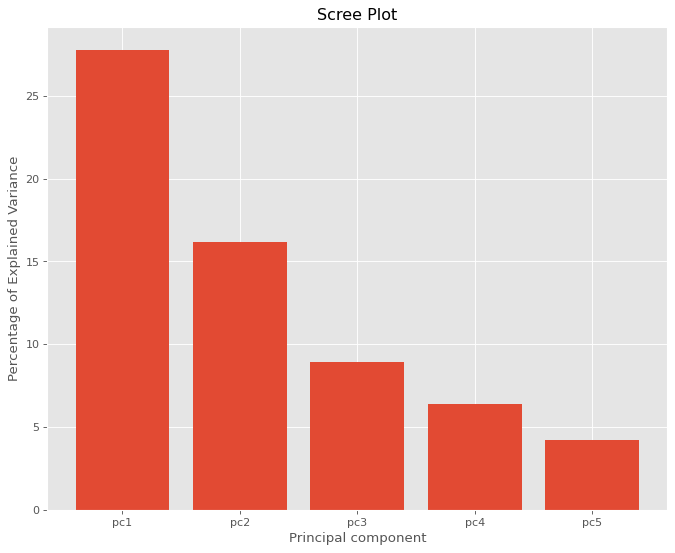

In [38]:
#calculating the percentage of variation that each principal component accounts for
per_var = np.round(explained_variance*100, decimals=1)
labels = ['pc' + str(x) for x in range(1, len(per_var)+1)]
figure(num=None, figsize=(10, 8), dpi=80)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label= labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

In [40]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,multi_class='auto',solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_list=list(y_pred)

In [42]:
from sklearn.metrics import accuracy_score
y_true=list(y_test)
accuracy_score(y_true, y_pred_list)


0.9459459459459459

In [43]:
from sklearn import preprocessing
X_scaled=preprocessing.scale(X)

<IPython.core.display.Javascript object>


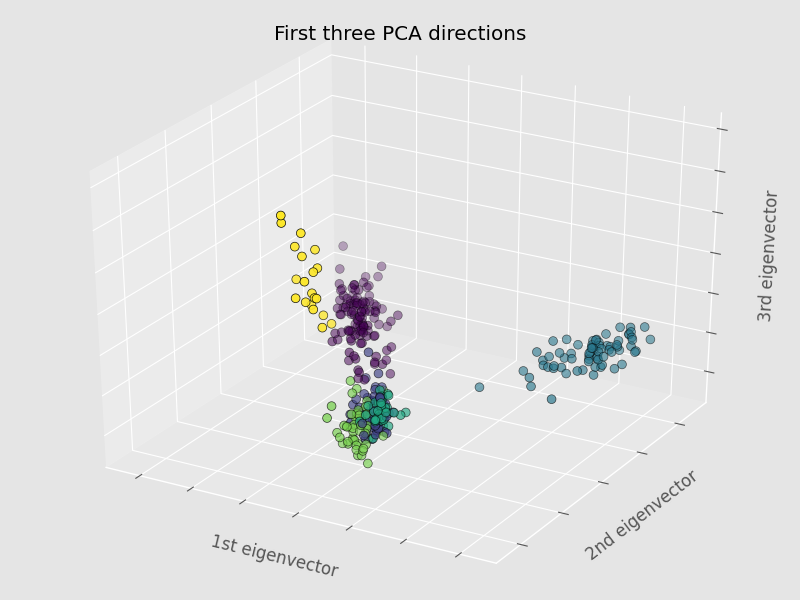

In [44]:
# Plot of the dataset
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimension
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
# print(X_reduced)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()